# Carregando bibliotecas

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas_profiling
import glob
plt.style.use('ggplot')
%matplotlib inline

import time

## Lendo os arquivos de viagens Q3 e Q4 (42 segundos para a leitura dos dados)

In [2]:
inicio = time.time()
arquivos = glob.glob('Divvy_Trips_2017_Q*.csv')

divvy_sets = []
for file in arquivos:
    print('Reading in {0}'.format(file))
    divvy_sets.append(pd.read_csv(file,
                                  parse_dates=['start_time', 'end_time'], 
                                  infer_datetime_format=True))
fim = time.time()
tempo = fim - inicio
print (tempo)

Reading in Divvy_Trips_2017_Q3.csv
Reading in Divvy_Trips_2017_Q4.csv
40.34145212173462


# juntando arquivos Q3 e Q4

In [10]:
divvy = pd.concat(divvy_sets)

divvy.shape

(2277509, 12)

# Verificando dados Nulos
### gender: 519960 e birthyear: 520075

In [11]:

divvy.apply(lambda x: sum(x.isnull()), axis=0)


trip_id                   0
start_time                0
end_time                  0
bikeid                    0
tripduration              0
from_station_id           0
from_station_name         0
to_station_id             0
to_station_name           0
usertype                  0
gender               519960
birthyear            520075
dtype: int64

In [6]:
# Verificando os tipos de dados
divvy.dtypes

trip_id                       int64
start_time           datetime64[ns]
end_time             datetime64[ns]
bikeid                        int64
tripduration                  int64
from_station_id               int64
from_station_name            object
to_station_id                 int64
to_station_name              object
usertype                     object
gender                       object
birthyear                   float64
dtype: object

### Definido birthyear=0, para visualizar mais facilmente os dados do ano de nascimento na forma de gráfico de barras.

In [7]:
inicio = time.time() # 38 segundos

divvy.birthyear.fillna(0, inplace=True)
divvy.birthyear = divvy.birthyear.astype(int)

# Verifica quais atributos estão nulos
divvy.apply(lambda x: sum(x.isnull()), axis=0)

fim = time.time()
tempo = fim - inicio
print (tempo)

36.75730609893799


# Gerando gráfico de barras por faixa de ano de nascimento

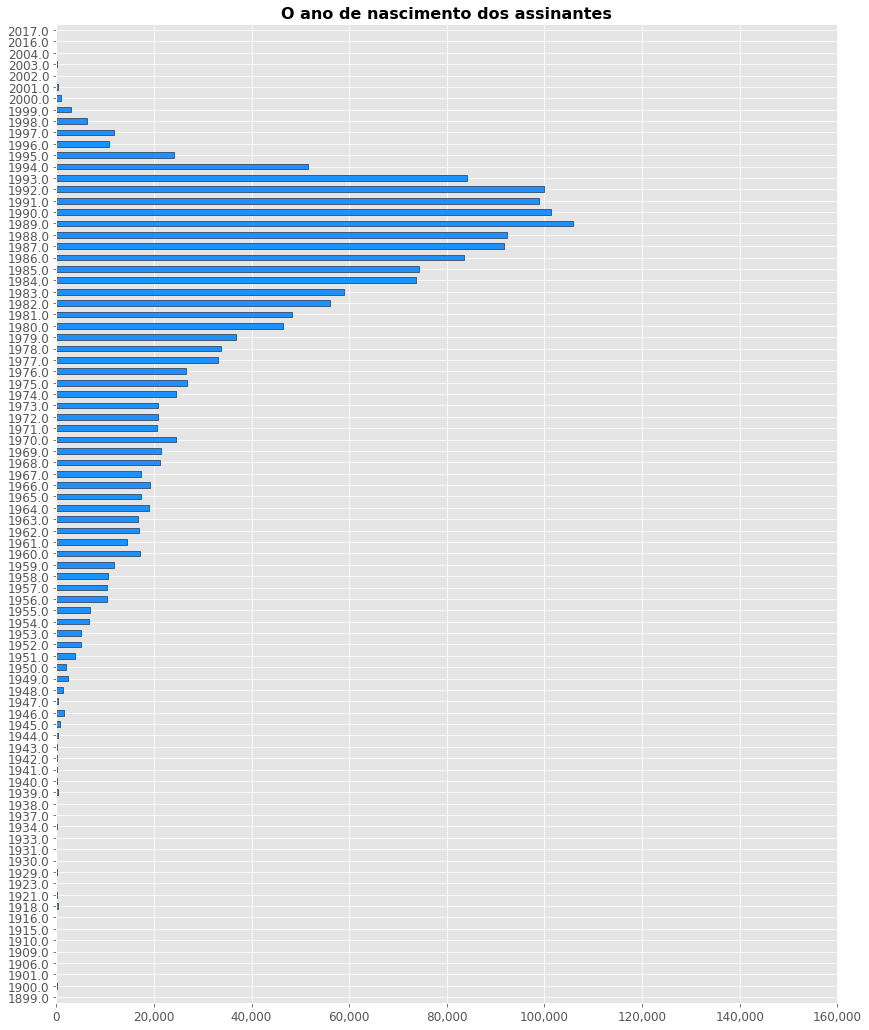

In [15]:
fig = plt.figure(figsize=(14, 18))
ax = fig.gca()
colors = ['#1e90ff']
divvy.birthyear.value_counts().sort_index()[1:].plot(kind='barh',
                                               color=colors,
                                               edgecolor="#000000")
plt.xticks([0, 20000, 40000, 60000, 80000,
            100000, 120000, 140000, 160000],
           ['0', '20,000', '40,000', '60,000','80,000',
            '100,000', '120,000', '140,000', '160,000'],
           fontsize=12)
plt.yticks(fontsize=12)
plt.title("O ano de nascimento dos assinantes", fontsize=16, fontweight='bold');

# TOTAL DA FAIXA DE IDADE (Geração Baby Boom)

In [13]:
faixa = divvy[(divvy.birthyear >= 1946) & (divvy.birthyear <= 1964)]
faixa.gender.value_counts().sum()

163573

# TOTAL DA FAIXA DE IDADE (Geração X)

In [14]:
faixa = divvy[(divvy.birthyear >= 1965) & (divvy.birthyear <= 1979)]
faixa.gender.value_counts().sum()

365503

# TOTAL DA FAIXA DE IDADE (Geração Y) com maior quantidade de usuários

In [16]:
faixa = divvy[(divvy.birthyear >= 1980) & (divvy.birthyear <= 1994)]
faixa.gender.value_counts().sum()

1167044

In [17]:
# Quantidade de usuários de 1980 a 1994 por gênero 
faixa.gender.value_counts()

Male      853134
Female    313910
Name: gender, dtype: int64

In [18]:
# Porcentagem da faixa de idade de 1980 a 1994 com mais usuários
faixa.gender.value_counts()/faixa.gender.value_counts().sum() * 100

Male      73.102128
Female    26.897872
Name: gender, dtype: float64